In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression

In [20]:
boston=pd.read_csv('HousingData.csv')

In [21]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [22]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [61]:
mv = boston['CRIM'].mean()
boston['CRIM'].fillna(value=mv, inplace=True)
mv = boston['ZN'].mean()
boston['ZN'].fillna(value=mv, inplace=True)
mv = boston['INDUS'].mean()
boston['INDUS'].fillna(value=mv, inplace=True)
mv = boston['CHAS'].mean()
boston['CHAS'].fillna(value=mv, inplace=True)
mv = boston['AGE'].mean()
boston['AGE'].fillna(value=mv, inplace=True)
mv = boston['LSTAT'].mean()
boston['LSTAT'].fillna(value=mv, inplace=True)

In [65]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [66]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.463457,4.170477,11.083992,0.004894,0.554695,6.236261,68.518519,3.724404,9.549407,408.237154,18.619630,383.831325,12.395469,20.862475
std,2.017846,7.523084,6.699165,0.017506,0.115878,0.517629,27.439466,1.979785,8.707259,168.537116,1.936255,15.446343,6.495613,6.209995
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,5.600000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.899750,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.100000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.224500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,2.808720,4.170477,18.100000,0.000000,0.624000,6.515250,93.575000,5.112625,24.000000,666.000000,20.200000,396.225000,16.275000,23.800000
max,8.716750,30.000000,27.740000,0.069959,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,36.500000


In [67]:
x =boston.drop('MEDV',axis=1)
y = boston['MEDV']

In [68]:
x
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

In [70]:
lm = LinearRegression()

In [71]:
model = lm.fit(xtrain,ytrain)

In [72]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [73]:
df = pd.DataFrame(ytrain_pred,ytrain)
df = pd.DataFrame(ytest_pred,ytest)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
mse = mean_squared_error(ytest,ytest_pred)
print(mse)

13.28401710209736


In [76]:
mse = mean_squared_error(ytrain,ytrain_pred)
print(mse)

13.163996171283847


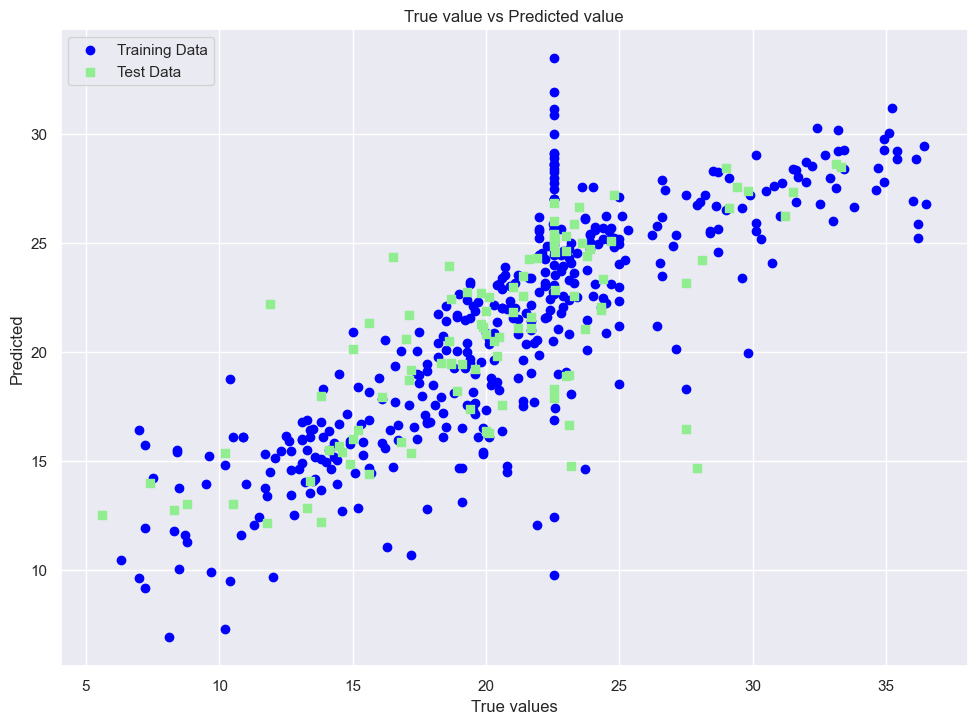

In [77]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training Data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test Data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()